In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
%matplotlib inline

In [3]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [6]:
def load_graph(graph_file):
    print(f"Loading graph from {graph_file}...")
    start_time = time.time()
    G = nx.read_graphml(graph_file)
    end_time = time.time()
    print(f"Graph loaded in {end_time - start_time:.2f} seconds. It has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    return G

In [7]:
G = load_graph("spotify_graph.graphml")

Loading graph from spotify_graph.graphml...
Graph loaded in 284.83 seconds. It has 73426 nodes and 8989885 edges.


In [18]:
# Filter the graph to include edges above a certain weight threshold
def filter_and_save_graph(G, output_file, edge_weight_threshold=1):
    print(f"Filtering graph to include only edges with weight > {edge_weight_threshold}...")
    start_time = time.time()
    edges_to_keep = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > edge_weight_threshold]
    H = G.edge_subgraph(edges_to_keep).copy()
    print(f"Filtered graph has {H.number_of_nodes()} nodes and {H.number_of_edges()} edges. Took {time.time() - start_time:.2f} seconds.")
    nx.write_graphml(H, output_file)
    print(f"Filtered graph saved to {output_file}")

    output_file = "interPlaylist.gml"  # Specify the new output file name
    filter_and_save_graph(G, output_file)

In [19]:
def degree_distribution_stats(G):
    N = len(G)
    L = G.size()
    degrees = [G.degree(node) for node in G]
    kmin = min(degrees)
    kmax = max(degrees)

    print("Number of nodes: ", N)
    print("Number of edges: ", L)
    print()
    print("Average degree: ", 2*L/N)
    print("Average degree (alternate calculation)", np.mean(degrees))
    print()
    print("Minimum degree: ", kmin)
    print("Maximum degree: ", kmax)

In [16]:
# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G, title="Degree Distribution"):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none', c='g')
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(title)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

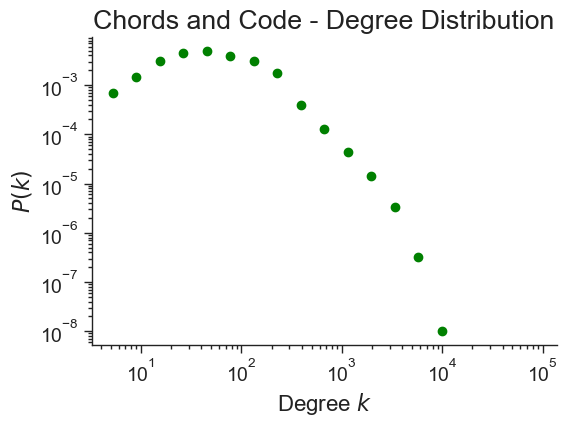

In [22]:
plot_degree_dist(G, "Chors and Code - Degree Distribution")

# Filter and Save the Graph
Only include nodes with the edgeweight of at least 1

In [20]:
filter_and_save_graph(G)
H = load_graph("interPlaylist.gml")

In [21]:
degree_distribution_stats(H)

Number of nodes:  45240
Number of edges:  1090453

Average degree:  48.20747126436782
Average degree (alternate calculation) 48.20747126436782

Minimum degree:  1
Maximum degree:  4294


In [ ]:
plot_degree_dist(H, "Chords and Code - Degree Distribution (At Least One Connection)")

# Clustering Coefficient and Shortest Path

In [28]:
# Find the clustering coefficient for our new filtered graph H
C = np.mean(list(nx.clustering(H).values()))
print("Average Clustering Coefficient: ", C)

Average Clustering Coefficient:  0.6041386283830384


Now find it for the largest component, to ensure we are calculating it for a component that is entirely connected

In [27]:
largest_cc = max(nx.connected_components(H), key=len)

# Create a subgraph of G containing only the nodes in largest_cc
H_largest = H.subgraph(largest_cc)

In [ ]:
# Calculate clustering coefficient
# Calculate the shortest path
C = np.mean(list(nx.clustering(H_largest).values()))
d = nx.average_shortest_path_length(H_largest,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

# Degree Preservation Analysis (Double-Edge Swap)

In [ ]:
# Calculating metrics for a Degree Preservation Graph

DP = H.copy() # the function edits the graph in place

nx.double_edge_swap(DP,nswap=10*G.number_of_edges(),max_tries=100000)
plot_degree_dist(DP)
plot_degree_dist(H)